# 2. Matplotlib


## 2.1 Gráfico simples

Um gráfico de dados fornecidos em listas:




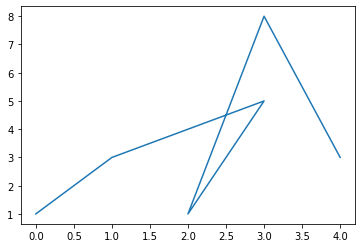

In [ ]:
import matplotlib.pyplot as plt   # 1

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

plt.figure()                      # 2

plt.plot(x, y)                    # 3
plt.show()                        # 4

1. Importamos o pacote ```matplotlib``` com alias ```plt```
2. ```fig``` é uma instância de figura ("quadro em branco")
3. Plotamos o gráfico, onde $x$ e $y$ são as coordenadas dos ponto
4. Mostramos o gráfico com o método ```show()```

Veja que, por padrão, o python apenas liga os dados com linhas, mas não identifica os pontos por símbolos. Troque o comportamento acima mudando a linha com a função ```plt.plot``` por

```python
plt.plot(x, y, 'o')
```

ou por

```python
plt.plot(x, y, '-o')
```

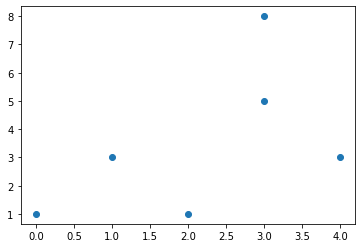

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

plt.figure()

plt.plot(x, y, 'o')
plt.show()

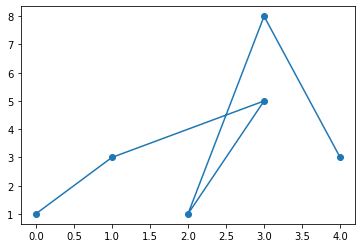

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

plt.figure()
plt.plot(x, y, '-o')

plt.show()

Existem muitas outras opções de símbolos, tipos de linhas e cores, que você encontra na documentação ou em tutoriais.

## 2.2 Formatando o gráfico

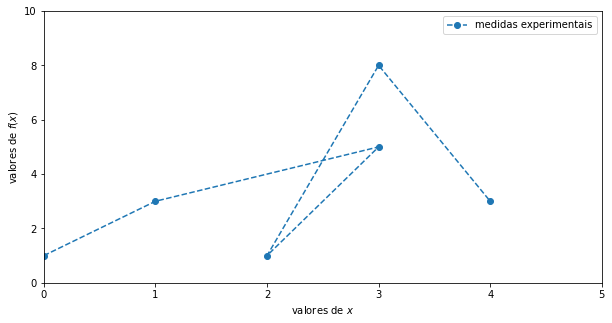

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

plt.figure(figsize=(10,5))                             # 1

plt.plot(x, y,'--o', label='medidas experimentais')    # 2

plt.xlim(0,5)                                          # 3
plt.ylim(0,10)                                         # 4

plt.xlabel('valores de $x$')                           # 5
plt.ylabel('valores de $f(x)$')                        # 6

plt.legend(loc='best')                                 # 7
plt.show()

1. ```figsize```: permite definir o tamanho da figura
2. ```label```: acrescenta um rótulo para a função
3. ```plt.xlim```: limite do eixo $x$
4. ```plt.ylim```: limite do eixo $y$
5. ```plt.xlabel```: rótulo do eixo $x$, podemos usar LaTeX!
6. ```plt.ylabel```: rótulo do eixo $y$, podemos usar LaTeX!
7.  ```legend```: inclui a legend na figura

Podemos mudar a posição da legenda na figura com a opção ```loc```:

| String | Código |
|---|---|
| 'best'| 0|
| 'upper right'| 1|
| 'upper left'| 2|
| 'lower left'| 3|
| 'lower,right'| 4|
| 'right'| 5|
| 'center left'| 6|
| 'center right'| 7|
| 'lower center'| 8|
| 'upper center'| 9|
| 'center'| 10|


## 2.3 Gráfico de um função

Você pode combinar o matplotlib com recursos do numpy para fazer gráficos de funções matemáticas:

Vamos plotar a função seno para 101 pontos no intervalo $[-\pi$, $2\pi)$

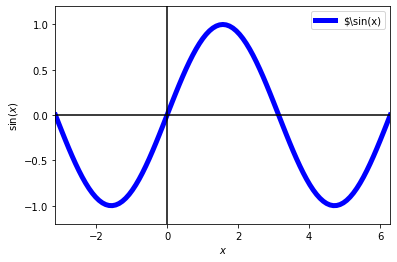

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt    

x = np.linspace(-np.pi, 2*np.pi, 101)                  
y = np.sin(x)                                          

plt.figure()                                           

plt.plot(x, y, 'b-', linewidth = 5, label='$\sin(x)') # 1 

plt.xlim(-np.pi,2*np.pi)                               
plt.ylim(-1.2, 1.2)                                    

plt.xlabel('$x$')                                      
plt.ylabel('$\sin(x)$')                                

plt.axhline(y=0, color='k')                            # 2
plt.axvline(x=0, color='k')                            # 3

plt.legend()                                           

plt.show()                          

1. ```linewidth``` define a largura da linha
2. ```plt.axhline(y=0, color='k')``` adiciona uma linha horizontal em $y=0$
3. ```plt.axvline(x=0, color='k')``` adiciona uma linha vertical em $x=0$

Podemos adicionar quantas funções quisermos no gráfico. Por exemplo:


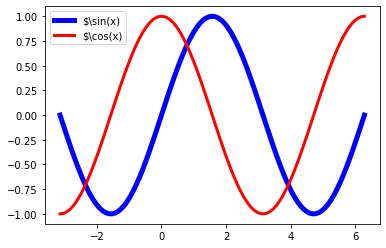

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt    

x = np.linspace(-np.pi, 2*np.pi, 101)                  
y = np.sin(x) 
z = np.cos(x)                                         

plt.figure()                                           

plt.plot(x, y, 'b-', linewidth = 5, label='$\sin(x)')    
plt.plot(x, z, 'r-', linewidth = 3, label='$\cos(x)')                                   

plt.legend()                                           
plt.show()                    

plt.savefig('meugrafico.png')

* ```savefig```: salva o gráfico em um arquivo

In [ ]:
!ls

meugrafico.png	sample_data


## 2.4 Gráfico com barras de erro

Um tipo de gráfico muito útil para apresentar medidas experimentais, e seus respectivos desvios-padrão, é o gráfico com barras de erros. 

A função ```errorbar()``` no módulo ```pyplot``` da biblioteca ```matplotlib``` é usada para plotar $y$ versus $x$ como linhas e/ou marcadores com barras de erro anexadas.


### Desvio constante

Quando o desvio é o mesmo para todos os pontos, faça simplesmente isso:

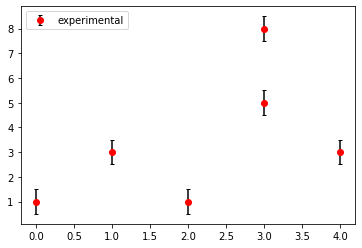

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

desvio = .5

plt.figure()

plt.errorbar(x, y, yerr=desvio, fmt='ro', ecolor='black', capsize=2, label='experimental')

plt.legend()
plt.show()

* ```xerr, yerr```: matriz de erros
* ```fmt```: parâmetro opcional e contém o valor da string
* ```ecolor```: parâmetro opcional e é a cor das linhas da barra de erros com o valor padrão ```NONE```
* ```capsize```: parâmetro opcional, define o comprimento dos limites da barra de erro em pontos com o valor padrão ```NONE```

### Desvio como porcentagem

Digamos agora que o desvio corresponde a $10\%$ dos valores de y. Faça o seguinte: troque a definição de desvio por ```desvio = .1 * np.array(y)```.

Veja que, para facilitar a nossa vida, criamos uma versão de $y$ como um array antes de multiplicar por $0.1$. Caso contrário, teríamos que usar um laço ou list comprehension: ```desvio = [.1 * v for v in y]```

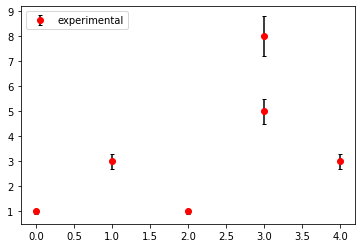

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

desvio = .1 * np.array(y)

plt.figure()

plt.errorbar(x, y, yerr=desvio, fmt='ro', ecolor='black', linestyle=None, capsize=2, label='experimental')

plt.legend()
plt.show()

### Desvio variável

Digamos agora que os desvios são diferentes para cada ponto, mas não são necessariamente uma porcentagem do valor medido. Nesse caso também não é difícil de criar um gráfico com barras de erros: basta criar uma nova lista (ou array) com os desvios de cada ponto.

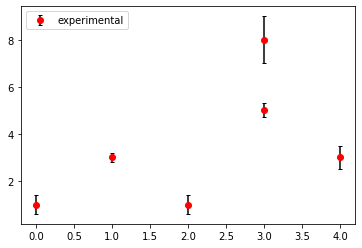

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 3, 2, 3, 4]
y = [1, 3, 5, 1, 8, 3]

desvio = [.4, .2, .3, .4, 1, .5]

plt.figure()

plt.errorbar(x, y, yerr=desvio, fmt='ro', ecolor='black', linestyle=None, capsize=2, label='experimental')

plt.legend()
plt.show()

## 2.5 Funções descontínuas

Considere a função:

$$ y = \begin{cases}
      x, & x < 0.5 \\
      1+x, & x \geq 0 .5
\end{cases} $$


Podemos plotar a função usando o seguinte código:



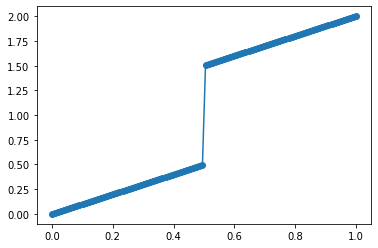

In [ ]:
plt.figure()

x = np.linspace(0,1,100)           
y = np.zeros(100)            # array y, inicializado com zero

for i in range(100):
  if x[i] < 0.5:
    y[i] = x[i]
  else: 
    y[i] = 1 + x[i]

plt.plot(x, y, '-o')  

plt.show()

Podemos simplificar a geração da função usando o fato que estamos trabalhando com arrays:

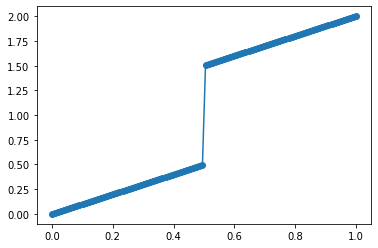

In [ ]:
plt.figure() 

x = np.linspace(0,1,100)           
y = np.zeros(100)     

y[x < 0.5] = x[x < 0.5]
y[x >= 0.5] = 1 + x[x >= 0.5]

plt.plot(x, y, '-o')  

plt.show()

Para quebrar a linha em múltiplos seguimentos, usamos ```np.nan```:

* ```np.diff(y)```: diferença entre os elementos de um array ($ out[n] = y[n+1] - y[n]$)
* ```np.abs```: retorna o valor absoluto do seu argumento
* ```np.where(condicao[x,y])```: retorna elementos (de $x$ ou $y$) em um ```ndarray```ou tupla de ```ndarrays```, dependendo da ``condicao```
* ```x[pos] = np.nan``` e ```y[pos] = np.nan```: substitui o ponto onde ocorre a descontinuidade por ```np.nan```

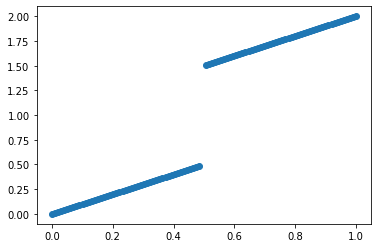

In [ ]:
plt.figure() 

x = np.linspace(0,1,100)           
y = np.zeros(100)     

y[x < 0.5] = x[x < 0.5]
y[x >= 0.5] = 1 + x[x >= 0.5]

pos = np.where(np.abs(np.diff(y)) >= 0.5)[0]

x[pos] = np.nan                                   # acrescentamos pontos de quebra
y[pos] = np.nan                                   # acrescentamos pontos de quebra

plt.plot(x, y, '-o')  

plt.show()

Note que o ponto $x=0.5$ foi perdido, então para corrigir, fazemos:

* ```x = np.insert(x, pos, np.nan)``` e ```y = np.insert(x, pos, np.nan)```: acrescentamos um novo ponto no array ao invés de substituí-lo

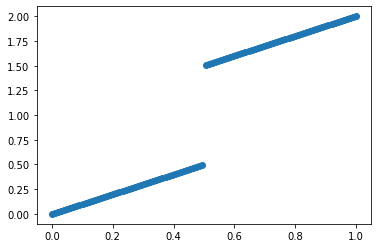

In [ ]:
plt.figure()

x = np.linspace(0,1,100)           
y = np.zeros(100)     

y[x < 0.5] = x[x < 0.5]
y[x >= 0.5] = 1 + x[x >= 0.5]

pos = np.where(np.abs(np.diff(y)) >= 0.5)[0]+1    # acrescentamos +1 a posição

x = np.insert(x, pos, np.nan)                     # acrescentamos pontos de quebra
y = np.insert(y, pos, np.nan)                     # acrescentamos pontos de quebra

plt.plot(x, y, '-o')  

plt.show()

# Exercício:

Faça uma função que gere o gráfico da função $y=x^2-9$ com 200 pontos e valores de $x \in [-10, 10]$

<img src="figures/exercicio-matplotlib.png" />

